In [2]:
from tdmclient import ClientAsync
from local_navigation import localNavigation
from global_navigation import GlobalNavigation
from Vision import Vision
import time
from motion_control import MotionControl
from robot_api import Thymio
from global_navigation import GlobalNavigation
import numpy as np

client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node d39ca52c-6d75-449e-96ee-13586c1312f5

In [2]:
#await node.unlock()

In [3]:
#create vision module object
visio = Vision()
visio.begin()

Caméra initialisée sur le port 4


In [4]:
# visio.stop() #stop the visio module
# t, g, o = visio.get_thymio_goal_and_obstacles() #get the lists you need
# print(o)
# print(g)
# print(t)

In [5]:
"""Point d'entrée principal"""
global_nav = GlobalNavigation()
Thymio = Thymio(node, client)
motion_control = MotionControl(Thymio)
local_navigation = localNavigation()



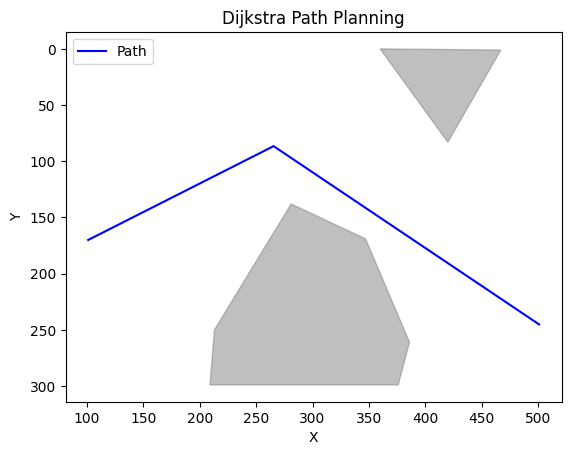

In [6]:
thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()

path, _, _ = global_nav.dijkstra(thymio, goal, obstacles)
if path:
    global_nav.plot_path(path, obstacles)
    visio.camera_feed.analysis.path = path.copy()
else:
    print("No valid path found. Cannot plot.")

In [7]:
# print(path)

In [8]:
path.pop(0)
goal_point = path[0]
glob_loc = 0
speed = [0,0]

try:
    while True:
        prox_horizontal = motion_control.read_prox_sensors()
        glob_loc = local_navigation.global_to_local(prox_horizontal, glob_loc)
        #print(prox_horizontal)
       
        if(glob_loc == 0):
            glob_loc = local_navigation.global_to_local(prox_horizontal, glob_loc)
            if motion_control.path_tracking(thymio, goal_point):
                path.pop(0)
                if not path:
                    motion_control.set_motor_speed(0, 0)
                    break
                else:
                    goal_point = path[0]
            thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()
        if(glob_loc == 1):
            y = motion_control.get_motor_speed()
            speed = local_navigation.reactive_control(prox_horizontal, y)
            motion_control.set_motor_speed(speed[0], speed[1])
            glob_loc = local_navigation.global_to_local(prox_horizontal, glob_loc)
            if(glob_loc == 0):
                thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()
                path, _, _ = global_nav.dijkstra(thymio, goal, obstacles)
                visio.camera_feed.analysis.path = path.copy()
    print("ARRIVED")



except KeyboardInterrupt:
    print("Stop the program")
finally:
    visio.stop()
    print("Program stops")

theta =  2.0344439
alpha =  0.5142956
vitesse lineaire de base  5678.9204
distance du but 283.946
theta =  2.0344439
alpha =  0.5142956
vitesse lineaire de base  5678.9204
distance du but 283.946
theta =  2.0591302
alpha =  0.49330282
vitesse lineaire de base  5634.925
distance du but 281.74625
theta =  2.0968628
alpha =  0.46128082
vitesse lineaire de base  5558.4663
distance du but 277.9233
theta =  2.1437626
alpha =  0.41624975
vitesse lineaire de base  5462.3066
distance du but 273.11533
theta =  2.1815224
alpha =  0.38656425
vitesse lineaire de base  5365.709
distance du but 268.28546
theta =  2.2621334
alpha =  0.30882335
vitesse lineaire de base  5233.811
distance du but 261.69055
theta =  2.2822554
alpha =  0.29289842
vitesse lineaire de base  5159.201
distance du but 257.96005
theta =  2.2996511
alpha =  0.27987838
vitesse lineaire de base  5085.1816
distance du but 254.25908
theta =  2.3191743
alpha =  0.2634399
vitesse lineaire de base  4995.1055
distance du but 249.75526
th

: 

In [9]:
motion_control.set_motor_speed(0, 0)
#test

In [ ]:
prox_horizontal = motion_control.read_prox_sensors()
print(prox_horizontal)

Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
[0, 0, 0, 0, 0, 0, 0]


Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected
Thymio not detected


Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/epuck/.pyenv/versions/3.10.13/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/epuck/Documents/MoBot/Exercises/Projet/MICRO452_Mobile_Robots/Vision.py", line 547, in run
    goal_position = self.analysis.detect_goal_position(goal_marker)
  File "/home/epuck/Documents/MoBot/Exercises/Projet/MICRO452_Mobile_Robots/Vision.py", line 410, in detect_goal_position
    x,y,_ = self.find_marker_center_and_orientation(goal_marker)
  File "/home/epuck/Documents/MoBot/Exercises/Projet/MICRO452_Mobile_Robots/Vision.py", line 246, in find_marker_center_and_orientation
    tl,tr,br,bl = marker
ValueError: not enough values to unpack (expected 4, got 2)


Thymio not detected
